In [1]:
# multivariate multi-step data preparation
import numpy as np
from numpy import array
from numpy import hstack
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf

df = pd.read_csv('dasatest_N.csv')
print(df)
df['Month'] = pd.to_datetime(df.Month , format = '%d-%m-%Y')
data = df.drop(['Month'], axis=1)
data.index = df.Month
cols = data.columns
data = np.array(data)
df_for_training = data
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
data_scaled = df_for_training_scaled[:,:]
print(data_scaled)

data_scaled = np.array(data_scaled)

         Month  Region 1  Region 2  Region 3  Region 4  Region 5  Region 6  \
0   01-01-2013  0.154325  0.119708  0.178236  0.225016  0.318976  0.049922   
1   01-02-2013  0.122901  0.119831  0.165497  0.220602  0.316835  0.082337   
2   01-03-2013  0.127583  0.112970  0.190754  0.224240  0.328486  0.083182   
3   01-04-2013  0.501557  0.326049  0.321733  0.330916  0.483001  0.156701   
4   01-05-2013  0.103551  0.098852  0.203126  0.268934  0.380898  0.013289   
..         ...       ...       ...       ...       ...       ...       ...   
67  01-08-2018  0.234171  0.218367  0.263643  0.228902  0.289498  0.182184   
68  01-09-2018  0.294693  0.275179  0.296751  0.291502  0.368923  0.254764   
69  01-10-2018  0.373754  0.344997  0.400269  0.364874  0.416527  0.274649   
70  01-11-2018  0.333642  0.300503  0.360406  0.311379  0.372523  0.270893   
71  01-12-2018  0.242176  0.215147  0.335923  0.271102  0.392835  0.158835   

    Region 7  Region 8  Region 9  ...  Region 3906  Region 3907

In [2]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
n_steps_in, n_steps_out = 12 ,15 
# covert into input/output
X, y = split_sequences(data_scaled, n_steps_in, n_steps_out)
print(X.shape, y.shape)
# summarize the data

(46, 12, 3915) (46, 15, 3915)


In [3]:
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(8, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features, activation='linear')))
model.compile(loss='mape', optimizer='SGD')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               1606400   
                                                                 
 repeat_vector (RepeatVector  (None, 15, 100)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 15, 8)             3488      
                                                                 
 time_distributed (TimeDistr  (None, 15, 3915)         35235     
 ibuted)                                                         
                                                                 
Total params: 1,645,123
Trainable params: 1,645,123
Non-trainable params: 0
_________________________________________________________________


In [6]:
# fit model
history = model.fit(X, y, epochs=250, verbose=1)

Epoch 1/250
2/2 [==============================] - 0s 80ms/step - loss: 188.5161
Epoch 2/250
2/2 [==============================] - 0s 76ms/step - loss: 188.6778
Epoch 3/250
2/2 [==============================] - 0s 76ms/step - loss: 168.7686
Epoch 4/250
2/2 [==============================] - 0s 76ms/step - loss: 206.4236
Epoch 5/250
2/2 [==============================] - 0s 72ms/step - loss: 193.7058
Epoch 6/250
2/2 [==============================] - 0s 76ms/step - loss: 187.6628
Epoch 7/250
2/2 [==============================] - 0s 76ms/step - loss: 237.4342
Epoch 8/250
2/2 [==============================] - 0s 76ms/step - loss: 186.2627
Epoch 9/250
2/2 [==============================] - 0s 80ms/step - loss: 215.1803
Epoch 10/250
2/2 [==============================] - 0s 84ms/step - loss: 172.9246
Epoch 11/250
2/2 [==============================] - 0s 72ms/step - loss: 185.8439
Epoch 12/250
2/2 [==============================] - 0s 76ms/step - loss: 196.7561
Epoch 13/250
2/2 [=======

2/2 [==============================] - 0s 72ms/step - loss: 169.1789
Epoch 102/250
2/2 [==============================] - 0s 72ms/step - loss: 218.7079
Epoch 103/250
2/2 [==============================] - 0s 72ms/step - loss: 174.2076
Epoch 104/250
2/2 [==============================] - 0s 76ms/step - loss: 183.1476
Epoch 105/250
2/2 [==============================] - 0s 72ms/step - loss: 204.0392
Epoch 106/250
2/2 [==============================] - 0s 77ms/step - loss: 157.4889
Epoch 107/250
2/2 [==============================] - 0s 76ms/step - loss: 191.9303
Epoch 108/250
2/2 [==============================] - 0s 76ms/step - loss: 153.4827
Epoch 109/250
2/2 [==============================] - 0s 76ms/step - loss: 155.9436
Epoch 110/250
2/2 [==============================] - 0s 72ms/step - loss: 164.8920
Epoch 111/250
2/2 [==============================] - 0s 72ms/step - loss: 152.5664
Epoch 112/250
2/2 [==============================] - 0s 72ms/step - loss: 168.3066
Epoch 113/250
2/2 

2/2 [==============================] - 0s 76ms/step - loss: 205.3128
Epoch 200/250
2/2 [==============================] - 0s 72ms/step - loss: 189.0600
Epoch 201/250
2/2 [==============================] - 0s 76ms/step - loss: 179.6948
Epoch 202/250
2/2 [==============================] - 0s 76ms/step - loss: 162.1386
Epoch 203/250
2/2 [==============================] - 0s 76ms/step - loss: 227.1231
Epoch 204/250
2/2 [==============================] - 0s 76ms/step - loss: 187.8416
Epoch 205/250
2/2 [==============================] - 0s 76ms/step - loss: 199.7797
Epoch 206/250
2/2 [==============================] - 0s 68ms/step - loss: 169.0010
Epoch 207/250
2/2 [==============================] - 0s 68ms/step - loss: 167.2210
Epoch 208/250
2/2 [==============================] - 0s 72ms/step - loss: 162.5327
Epoch 209/250
2/2 [==============================] - 0s 72ms/step - loss: 290.2678
Epoch 210/250
2/2 [==============================] - 0s 72ms/step - loss: 153.0706
Epoch 211/250
2/2 

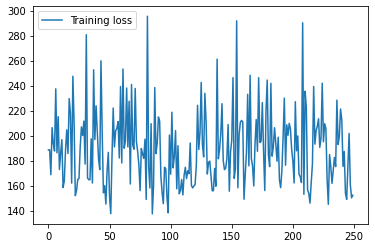

In [7]:
plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [9]:
x_input = data_scaled[-12:][:]
print(x_input.shape)

(12, 3915)


In [13]:
x_input = x_input.reshape((1,n_steps_in, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

1/1 [==============================] - 0s 209ms/step
[[[ 0.00493608 -0.01155141  0.00423651 ...  0.04519653  0.03099149
   -0.01868507]
  [ 0.00493608 -0.01155141  0.00423651 ...  0.04519653  0.03099149
   -0.01868507]
  [ 0.00493608 -0.01155141  0.00423651 ...  0.04519653  0.03099149
   -0.01868507]
  ...
  [ 0.00493608 -0.01155141  0.00423651 ...  0.04519653  0.03099149
   -0.01868507]
  [ 0.00493608 -0.01155141  0.00423651 ...  0.04519653  0.03099149
   -0.01868507]
  [ 0.00493608 -0.01155141  0.00423651 ...  0.04519653  0.03099149
   -0.01868507]]]


(1, 15, 3915)


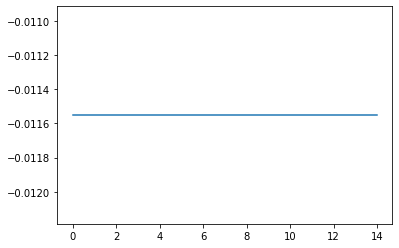

In [14]:
print(yhat.shape)
plt.plot(yhat[0,:,1])
yhat = yhat.reshape(15,3915)

In [15]:
y_pred_future = scaler.inverse_transform(yhat)
print(y_pred_future)

[[0.24104552 0.22186157 0.30116224 ... 0.7405639  1.6109474  0.5223851 ]
 [0.24104552 0.22186157 0.30116224 ... 0.7405639  1.6109474  0.5223851 ]
 [0.24104552 0.22186157 0.30116224 ... 0.7405639  1.6109474  0.5223851 ]
 ...
 [0.24104552 0.22186157 0.30116224 ... 0.7405639  1.6109474  0.5223851 ]
 [0.24104552 0.22186157 0.30116224 ... 0.7405639  1.6109474  0.5223851 ]
 [0.24104552 0.22186157 0.30116224 ... 0.7405639  1.6109474  0.5223851 ]]


In [16]:
# print(yhat.shape)
# plt.plot(y_pred_future[:,5])
# plt.plot(data_scaled[-15:,5])

In [17]:
# import math
# from sklearn.metrics import mean_absolute_percentage_error
# sum1 = 0
# for i in range(10):
# #     print(i+1,mean_absolute_percentage_error(yhat[:,i], data_scaled[-15:,i]))
#     sum1 += mean_absolute_percentage_error(yhat[:,i], data_scaled[-15:,i])

In [18]:
# print(sum1)

In [19]:
output = pd.DataFrame(y_pred_future)
output.to_csv('submission_aisehi_4.csv')
print("Your submission was successfully saved!")

Your submission was successfully saved!
